In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import *

In [0]:
folder = 'black_cars'
file = 'black_cars.txt'

In [0]:
path = Path('gdrive/My Drive/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images('drive/My Drive/cars/black_cars.txt', dest, max_pics=200)

In [0]:
folder = 'toy_cars'
file = 'toy_cars.txt'

In [0]:
path = Path('gdrive/My Drive/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images('drive/My Drive/cars/toy_cars.txt', dest, max_pics=200)

In [0]:
folder = 'vintage_cars'
file = 'vintage_cars.txt'

In [0]:
path = Path('gdrive/My Drive/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images('drive/My Drive/cars/vintage_cars.txt', dest, max_pics=200)

In [13]:
path.ls()

[PosixPath('gdrive/My Drive/cars/black_cars'),
 PosixPath('gdrive/My Drive/cars/vintage_cars'),
 PosixPath('gdrive/My Drive/cars/toy_cars')]

In [0]:
verify_images('gdrive/My Drive/cars/black_cars/', delete=True, max_size=500)

In [0]:
verify_images('gdrive/My Drive/cars/toy_cars/', delete=True, max_size=500)

In [0]:
verify_images('gdrive/My Drive/cars/vintage_cars/', delete=True, max_size=500)

In [0]:
classes = ['black','toy','vintage']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['black_cars', 'toy_cars', 'vintage_cars']

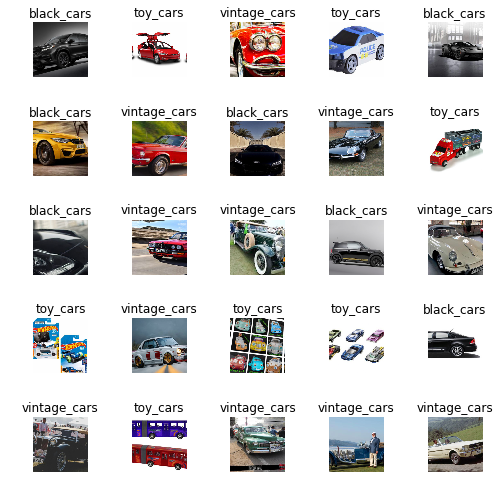

In [20]:
data.show_batch(rows=5,figsize=(7,7))

## RESNET 34-Model-freeze

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 116321976.93it/s]


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.410253,0.760387,0.381818,00:44
1,0.947862,0.502903,0.254545,00:46
2,0.678132,0.422321,0.163636,00:46
3,0.535201,0.354187,0.145455,00:46


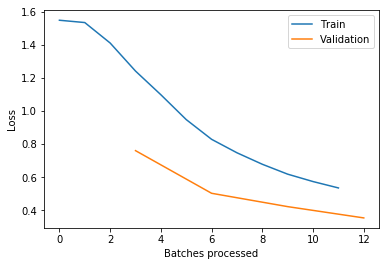

In [24]:
learn.recorder.plot_losses()

In [0]:
model_interpretation = ClassificationInterpretation.from_learner(learn)

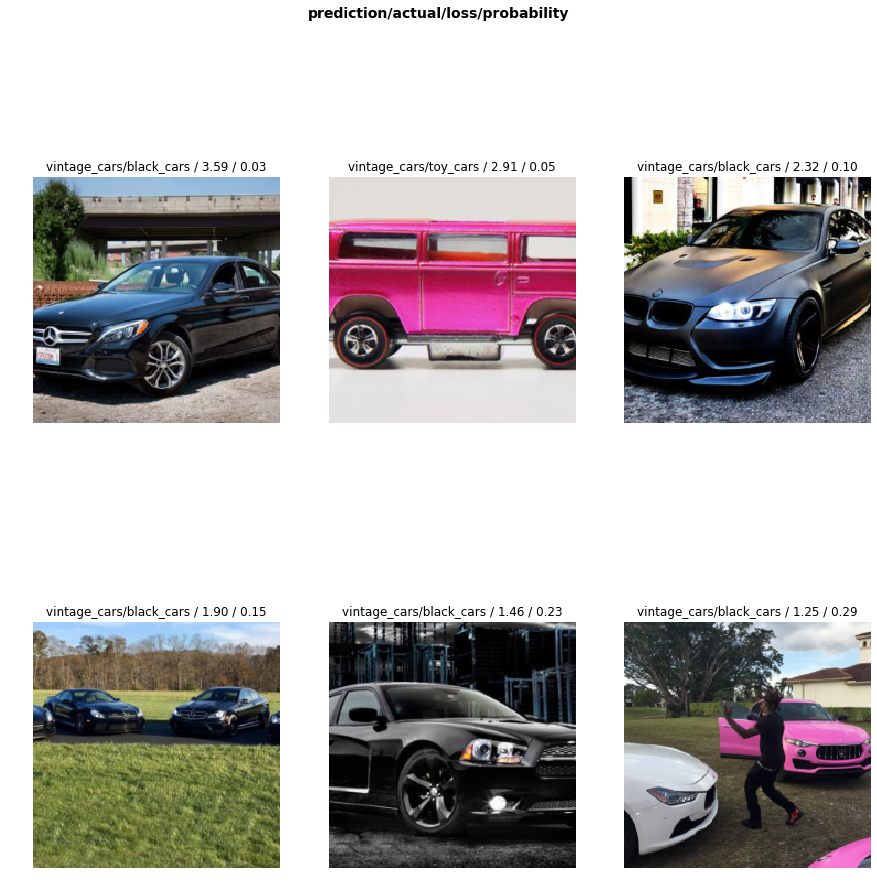

In [26]:
model_interpretation.plot_top_losses(6,figsize=(15,15))

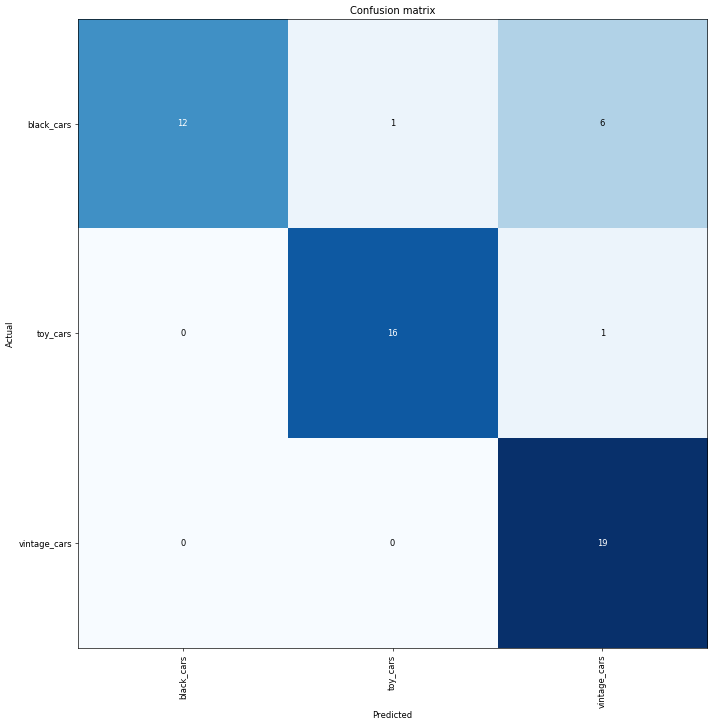

In [27]:
model_interpretation.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [28]:
model_interpretation.most_confused(min_val=2)

[('black_cars', 'vintage_cars', 6)]

## RESBLOCK

In [0]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=1,padding=1)


In [0]:
model = nn.Sequential(
    conv2(3, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 64),
    res_block(64),
    conv2(64, 32),
    res_block(32),
    conv2(32,16),
    Flatten()
)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=error_rate)

In [32]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,14.167216,13.644286,1.000000,03:25
1,13.866515,13.689078,1.000000,03:34
2,13.160458,13.506437,1.000000,03:30
3,11.876798,12.956715,1.000000,03:32
4,10.431586,11.686429,0.836364,03:33
5,9.038493,9.708242,0.563636,03:33
6,7.810552,6.218295,0.545455,03:33
7,6.858343,4.033603,0.472727,03:33
8,6.043586,1.794303,0.454545,03:35
9,5.406312,1.445122,0.563636,03:33


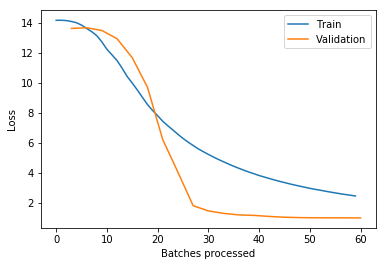

In [33]:
learn.recorder.plot_losses()

In [0]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 224, 224]        216        True      
______________________________________________________________________
ReLU                 [8, 224, 224]        0          False     
______________________________________________________________________
BatchNorm2d          [8, 224, 224]        16         True      
______________________________________________________________________
Conv2d               [8, 224, 224]        576        True      
______________________________________________________________________
ReLU                 [8, 224, 224]        0          False     
______________________________________________________________________
BatchNorm2d          [8, 224, 224]        16         True      
______________________________________________________________________
Conv2d               [8, 224, 224]        576        True      
___________________________________________________

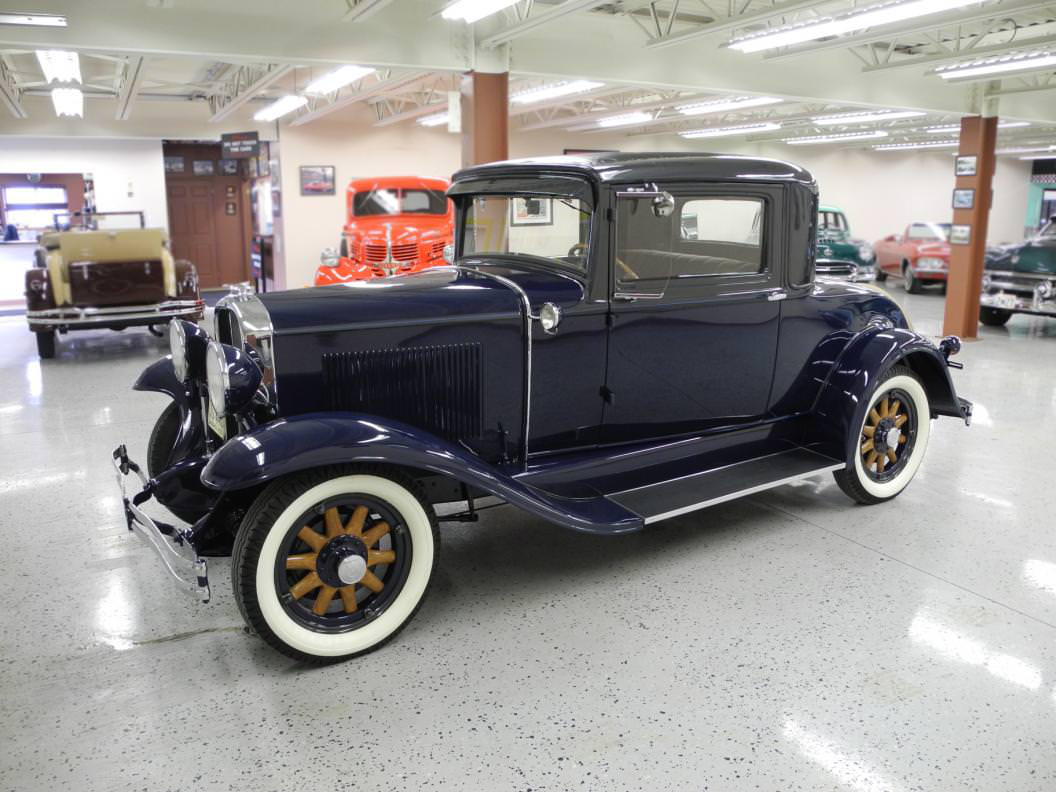

In [40]:
img = open_image('/content/black car image.jpg')
img

In [39]:
learn.predict(img)

(Category vintage_cars,
 tensor(2),
 tensor([4.0686e-01, 6.8992e-02, 5.2302e-01,  ..., 5.2579e-10, 5.3642e-10,
         5.3793e-10]))